   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                 

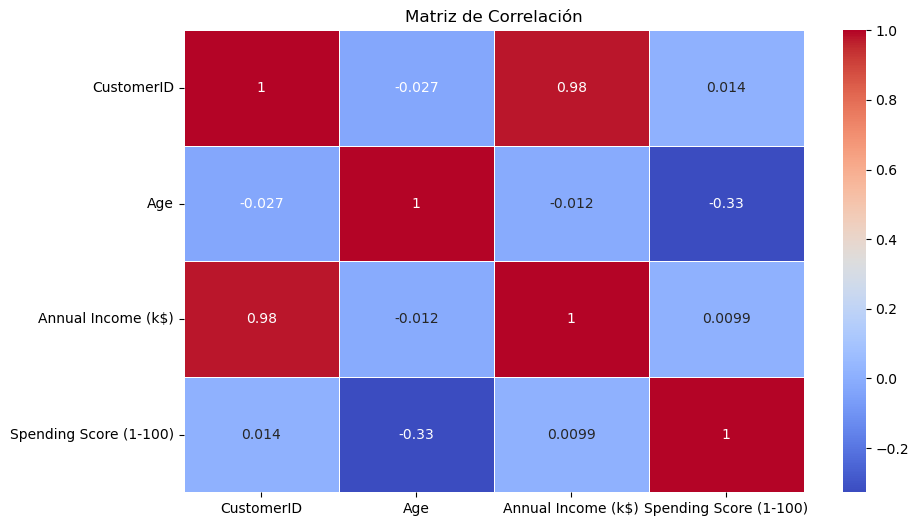

In [26]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Cargar el dataset
df = pd.read_csv("C:/Users/Javier Alexander Gar/Downloads/Mosquera tareas/ANÁLISIS DE DATOS/Tarea 4/Anexo 5 - Dataset Mall Customer Segmentation/Mall_Customers.csv")

# Verificar las primeras filas y la información general del dataset
print(df.head())
print(df.info())

# Verificar si hay valores nulos
print(df.isnull().sum())

# Estadísticas descriptivas
print(df.describe())

# Análisis de correlación entre las variables numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])  # Solo columnas numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [27]:
# Eliminar filas con valores nulos (si las hubiera)
df_clean = df.dropna()

# Codificar la columna 'Gender' de categórica a numérica (Male=0, Female=1)
df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})

# Verificación de los datos después de la limpieza
print(df_clean.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40


In [28]:
# Seleccionar las características numéricas relevantes para el modelo
X = df_clean[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalización de los datos para asegurar que todas las características tengan la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificación de las características seleccionadas
print(X_scaled[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


In [29]:
# Definir el modelo de Clustering Jerárquico con un número predeterminado de clusters
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Ajustar el modelo y predecir los clusters
df_clean['Cluster'] = hc.fit_predict(X_scaled)

# Ver los primeros registros con sus asignaciones de clusters
print(df_clean.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        4  
1        0  
2        4  
3        0  
4        4  


In [30]:
# Coeficiente de Silhouette
silhouette = silhouette_score(X_scaled, df_clean['Cluster'])
print(f"Coeficiente de Silhouette: {silhouette}")

# Índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X_scaled, df_clean['Cluster'])
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, df_clean['Cluster'])
print(f"Índice de Davies-Bouldin: {davies_bouldin}")


Coeficiente de Silhouette: 0.39002826186267214
Índice de Calinski-Harabasz: 107.82656032570374
Índice de Davies-Bouldin: 0.9162886109753661


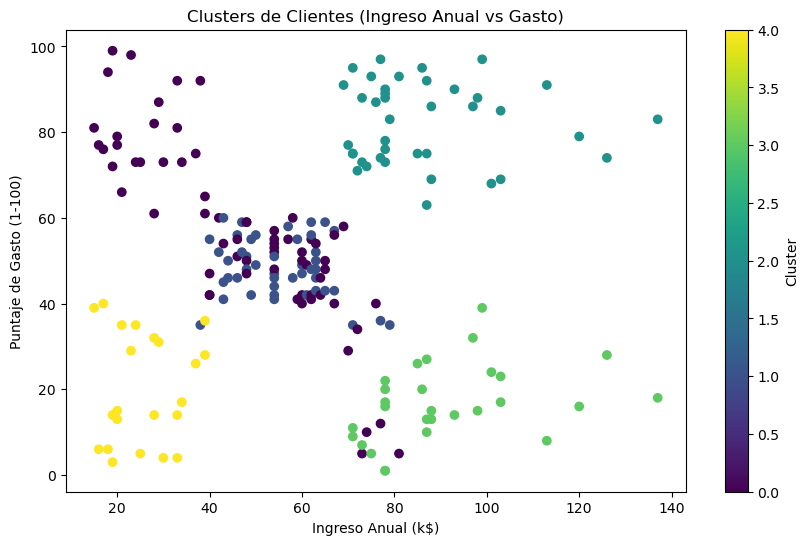

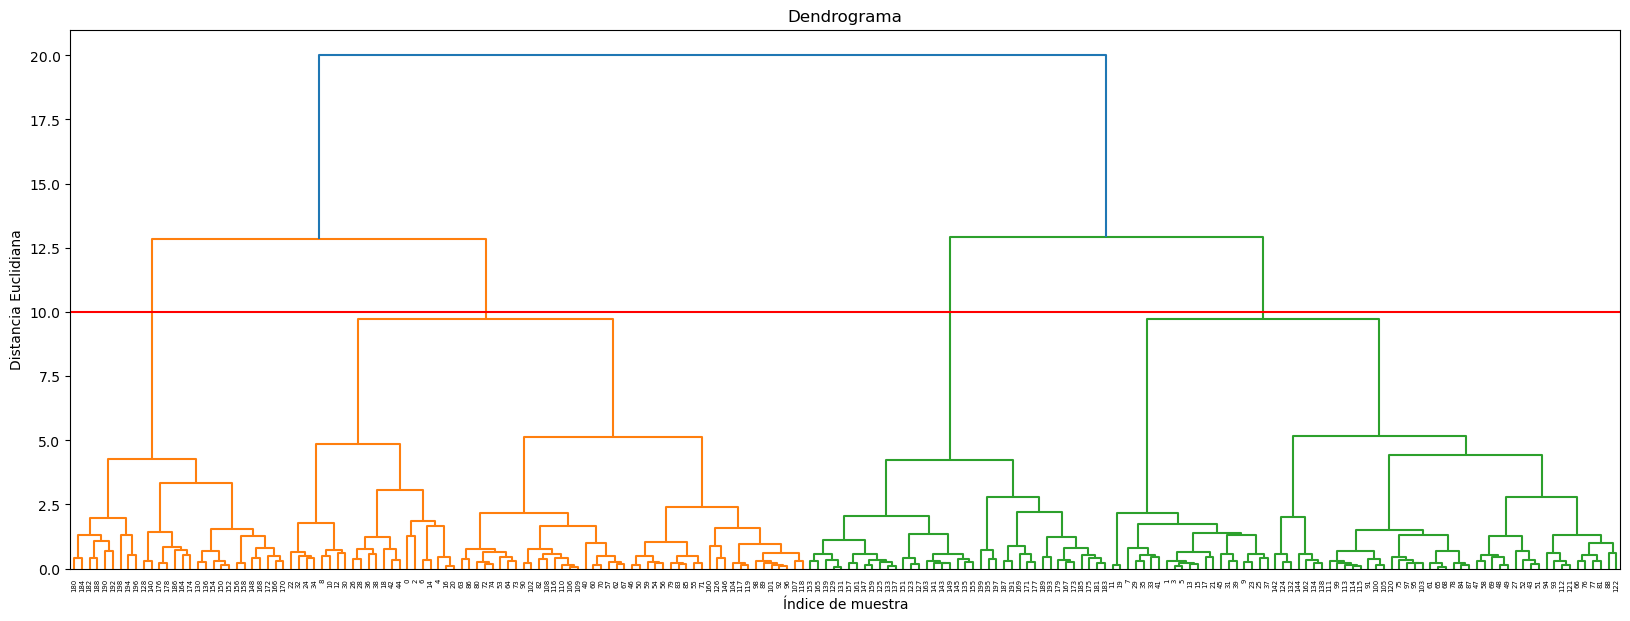

In [31]:
# Graficar los clusters en un gráfico 2D (Ingreso vs Gasto)
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Annual Income (k$)'], df_clean['Spending Score (1-100)'], c=df_clean['Cluster'], cmap='viridis')
plt.title('Clusters de Clientes (Ingreso Anual vs Gasto)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.colorbar(label='Cluster')
plt.show()

# Realizar el Clustering Jerárquico con el método Ward para el dendrograma
from scipy.cluster.hierarchy import linkage, dendrogram
ward_clustering = linkage(X_scaled, method="ward", metric="euclidean")

# Crear y mostrar el Dendrograma
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y=10, color='r', linestyle='-')  # Línea roja para cortar el dendrograma
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia Euclidiana')
plt.show()

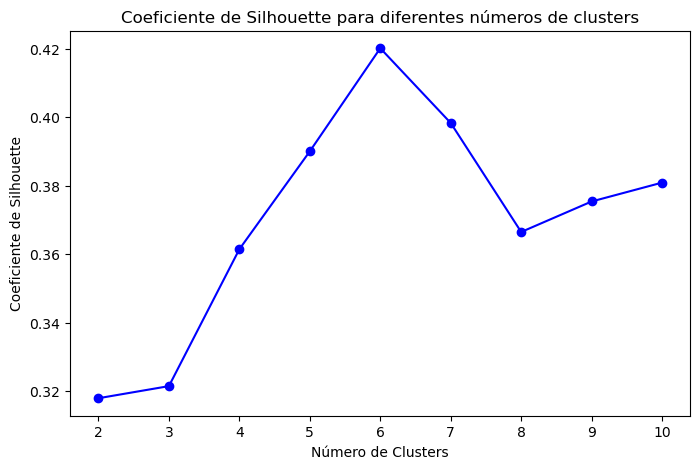


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.39002826186267214
Índice de Calinski-Harabasz: 107.82656032570374
Davies-Bouldin Index: 0.9162886109753661


In [32]:
# Evaluar diferentes números de clusters usando el Coeficiente de Silhouette
sil_scores = []
for n in range(2, 11):  # Rango de 2 a 10 clusters
    hc = AgglomerativeClustering(n_clusters=n, linkage='ward')
    cluster_labels = hc.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, cluster_labels)
    sil_scores.append(sil_score)

# Graficar los resultados de Silhouette para diferentes números de clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o', color='b')
plt.title('Coeficiente de Silhouette para diferentes números de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.show()

# Interpretación de resultados
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", silhouette)
print("Índice de Calinski-Harabasz:", calinski_harabasz)
print("Davies-Bouldin Index:", davies_bouldin)

In [33]:
# Importar las funciones necesarias
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet, linkage

# Calcular las distancias entre los puntos de datos
X_dist = pdist(X_scaled)

# Calcular la matriz de enlace (linkage)
Z = linkage(X_scaled, method='ward')

# Calcular el coeficiente de correlación cofenética
coef_cofenetico, _ = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: 0.6261774947075186
